In [1]:
from __future__ import division
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from Parameters_LV import *
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


DiscretePreyAverage = np.load('./Solutions/LVPreyAverage.npy')
DiscretePredAverage = np.load('./Solutions/LVPredAverage.npy')

ReferencePrey = np.load('./Solutions/FDLVSolution1.npy')
ReferencePred = np.load('./Solutions/FDLVSolution2.npy')

ts=0.1
maxtime=deltat*(timesteps-1)
constant=int(ts/deltat)

timesteps_cut = int(deltat * (timesteps-1) / ts)
print(timesteps_cut, deltat, timesteps-1, ts)

def HybridPlot(Average, Reference, bd):
    '''
    Creates hybrid plots, where the right side corresponds to the FD solution
    and the left side to the mean-field concentration obtained from the coupling.
    Average=mean-field concentration
    Concentration=FD solution
    bd=location of the boundary
    '''

    listH = []  # list of Hybrid solutions
    listR = []  # list of Reference solutions
    
   
    Hmean=np.zeros(timesteps_cut)
    Cmean=np.zeros(timesteps_cut)
    if len(Average)!=timesteps_cut:
        print('error')
        
    for t in range(timesteps_cut):
        Ref_t=Reference[(t+1)*constant]
        Average_t = np.transpose(Average[t]) 
        # create matrix fromt he particle discretization
        Particle = np.zeros(shape=(l_coupling,l_coupling))
        
        for i in range(l_coupling):
            for j in range(int(l_coupling / 2) ):
                Particle[i, j] = Average_t[i, j]
            
            for j in range(int(l_coupling / 2)):
                
                Particle[i,j+int(l_coupling/2)]=Ref_t[i,j+int(l_coupling/2)]
        listH.append(Particle)
            
        # average
        Hmean[t]=np.mean(Particle)
            
         
    
    for t in range(timesteps_cut):
        
        Ref_t=Reference[(t+1)*constant]
       
        
        Cmean[t]=np.mean(Ref_t)
        listR.append(Ref_t)

    return Hmean, Cmean, listH, listR


# generate hybrid plots

Prey_mean, RefPrey, HybridPrey, ReferencePrey = HybridPlot(DiscretePreyAverage, ReferencePrey, l_coupling)
Pred_mean, RefPred,  HybridPred, ReferencePred= HybridPlot(DiscretePredAverage,  ReferencePred, l_coupling)


#%%%
# Define the custom colormap with specified colors
colors1 = ['black','indigo', 'royalblue', 'lightskyblue', 'azure']
n_bins1 = 256  # Number of bins for the colormap

# Create the colormap
custom_colormap1 = LinearSegmentedColormap.from_list('custom_colormap', colors1, N=n_bins1)


def functionplot(Data, Max, Name):
    '''
    Creates and saves plots.
    Data=Hybrid or reference solution
    Max=Maximum plotting value
    Time=time-step
    Name=name of figure
    '''

    fig = plt.figure(figsize=(9.3, 7.8))  # Match figure size
    plt.imshow(Data, interpolation='nearest', cmap=custom_colormap1, extent=[0, a, 0, a])
    ax = plt.gca()
    cbar = plt.colorbar(fraction=0.045, pad=0.04)  # Adjust padding to make colorbar smaller
    ax.tick_params(labelsize=30)
    cbar.ax.tick_params(labelsize=30)
    plt.xlabel('x', fontsize=40)
    plt.ylabel('y', fontsize=40)
    plt.clim(-Max / 20, Max)
    plt.tight_layout()
    #plt.show()  # Display the plot interactively
    plt.savefig('./Plots/LV/LV_Reaction' + str(Name) + '.png') 
    
    

25 0.0025 1000 0.1


14.451556815635588 14.428247157528823
6.985988368358592 7.323832852735604
5.724098570774412 6.160434382940257


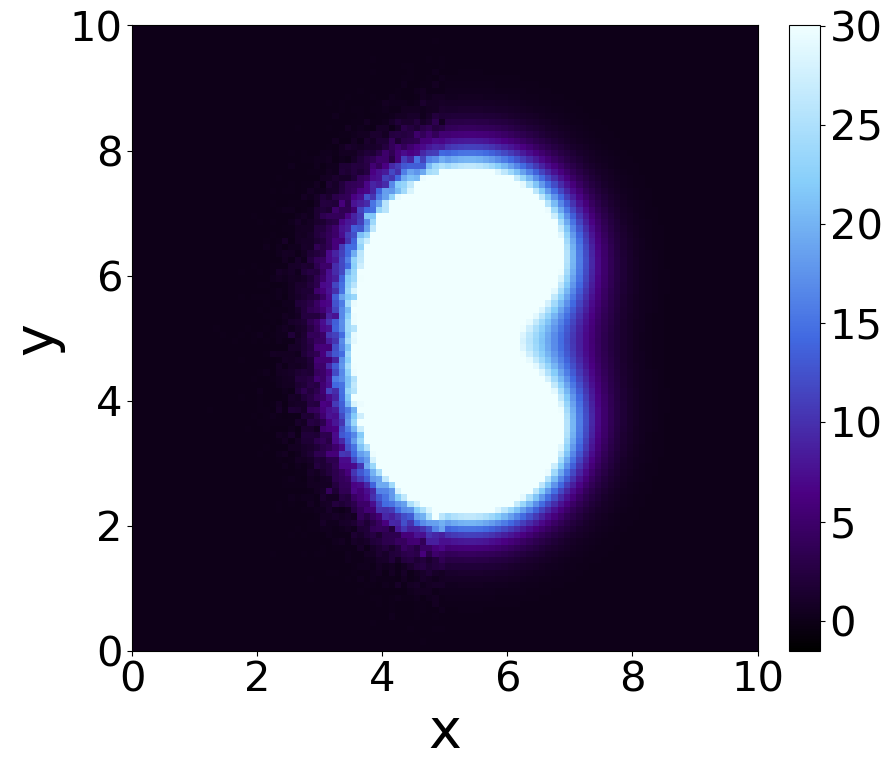

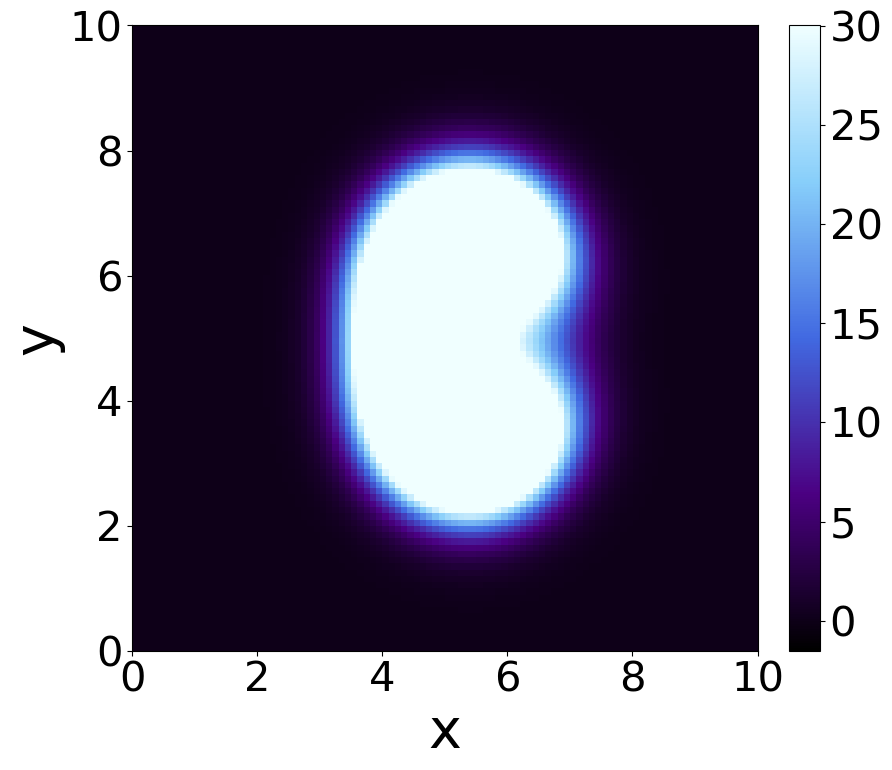

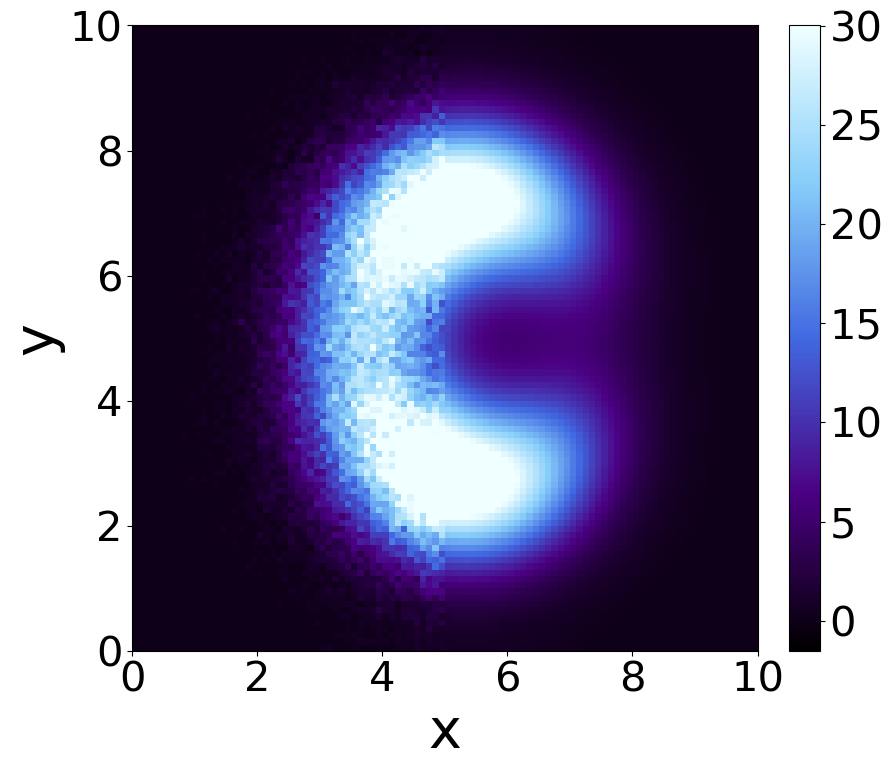

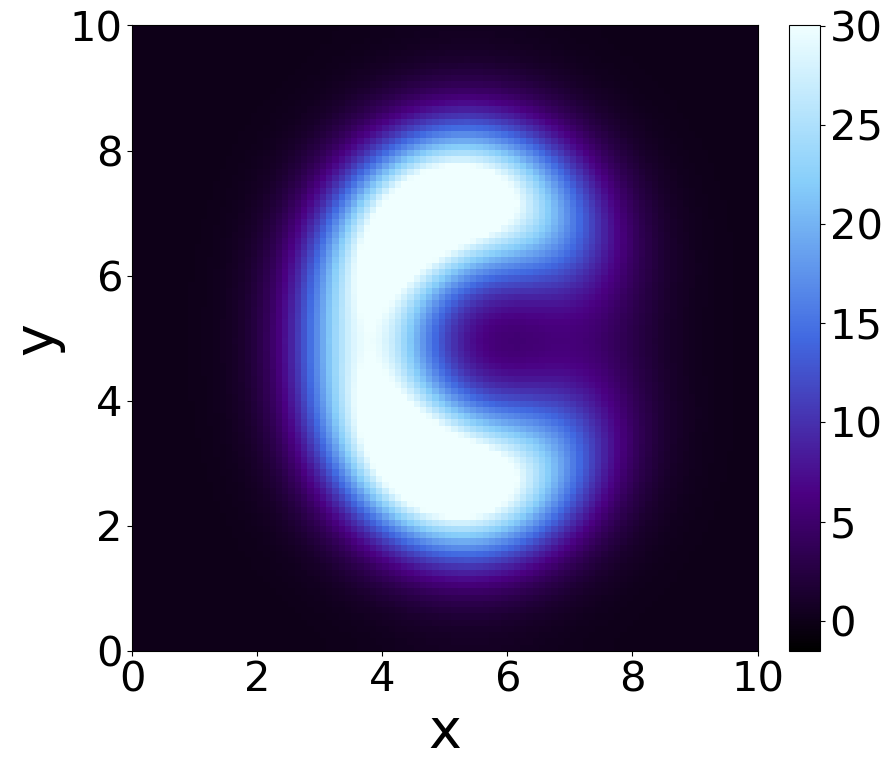

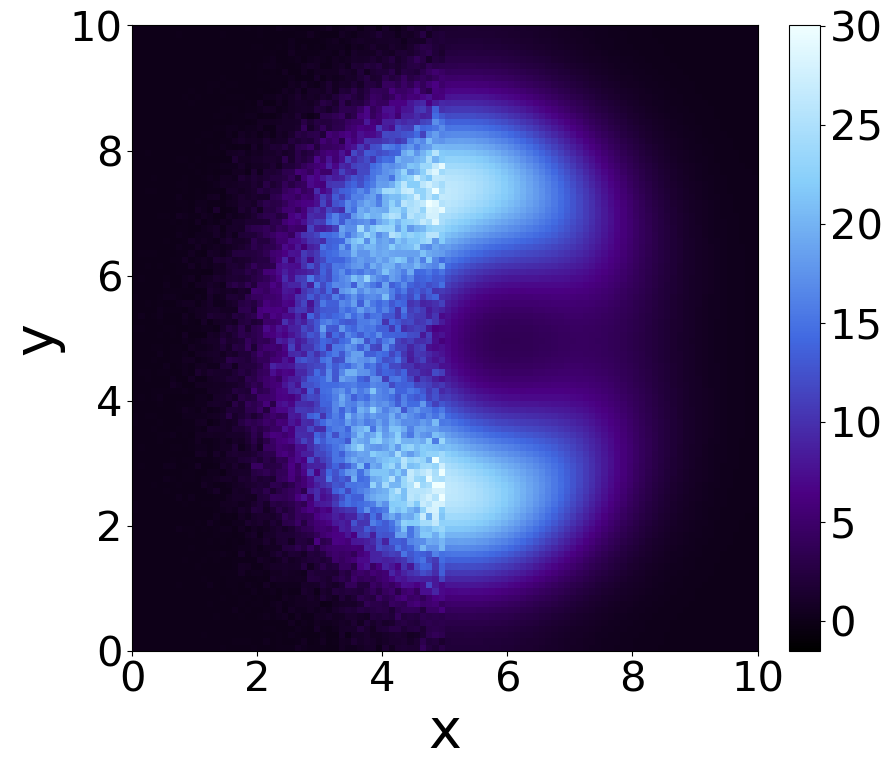

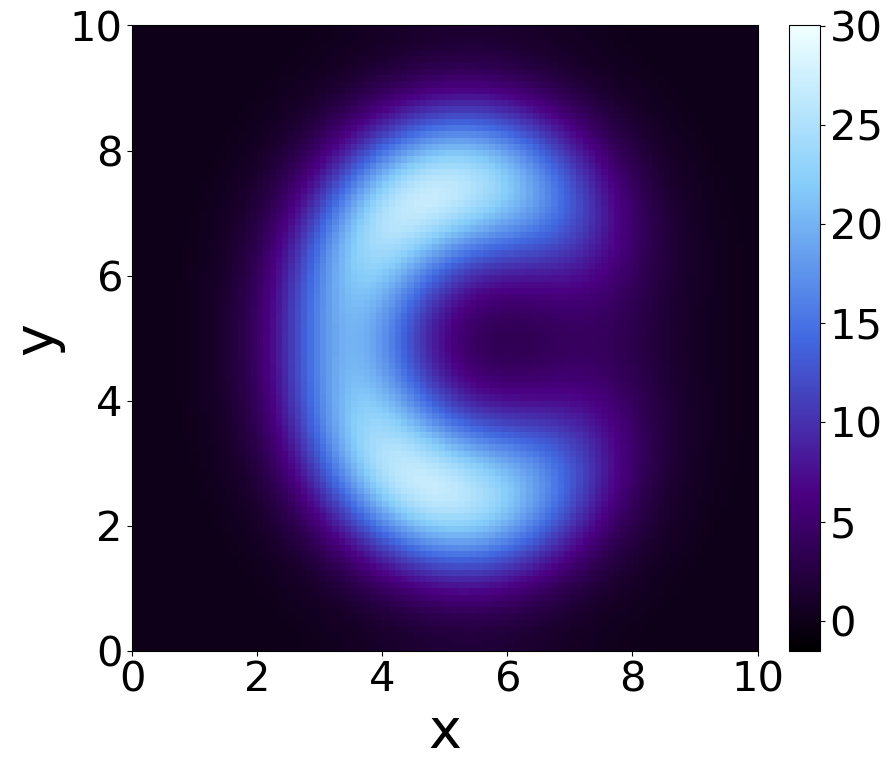

In [8]:

TimeSteps=[9,19,24]

time=np.linspace(0, len(ReferencePrey)-1,4)

functionplot(HybridPrey[TimeSteps[0]], 30, 'HybridPrey'+str(np.round((TimeSteps[0]+1)*constant*deltat, decimals=2)))
functionplot(ReferencePrey[TimeSteps[0]], 30, 'RefPrey'+str(np.round((TimeSteps[0]+1)*constant*deltat)))

print(np.mean(HybridPrey[TimeSteps[0]]), np.mean(ReferencePrey[TimeSteps[0]]))

functionplot(HybridPrey[TimeSteps[1]], 30, 'HybridPrey'+str(np.round((TimeSteps[1]+1)*constant*deltat)))
functionplot(ReferencePrey[TimeSteps[1]], 30, 'RefPrey'+str(np.round((TimeSteps[1]+1)*constant*deltat)))

print(np.mean(HybridPrey[TimeSteps[1]]), np.mean(ReferencePrey[TimeSteps[1]]))


functionplot(HybridPrey[TimeSteps[2]], 30, 'HybridPrey'+str(np.round((TimeSteps[2]+1)*constant*deltat)))
functionplot(ReferencePrey[TimeSteps[2]], 30, 'RefPrey'+str(np.round((TimeSteps[2]+1)*constant*deltat)))

print(np.mean(HybridPrey[TimeSteps[2]]), np.mean(ReferencePrey[TimeSteps[2]]))

22.243693523147197 21.74658159400504
23.85520604693992 23.275249231837787
22.104677907917512 21.568155484375083


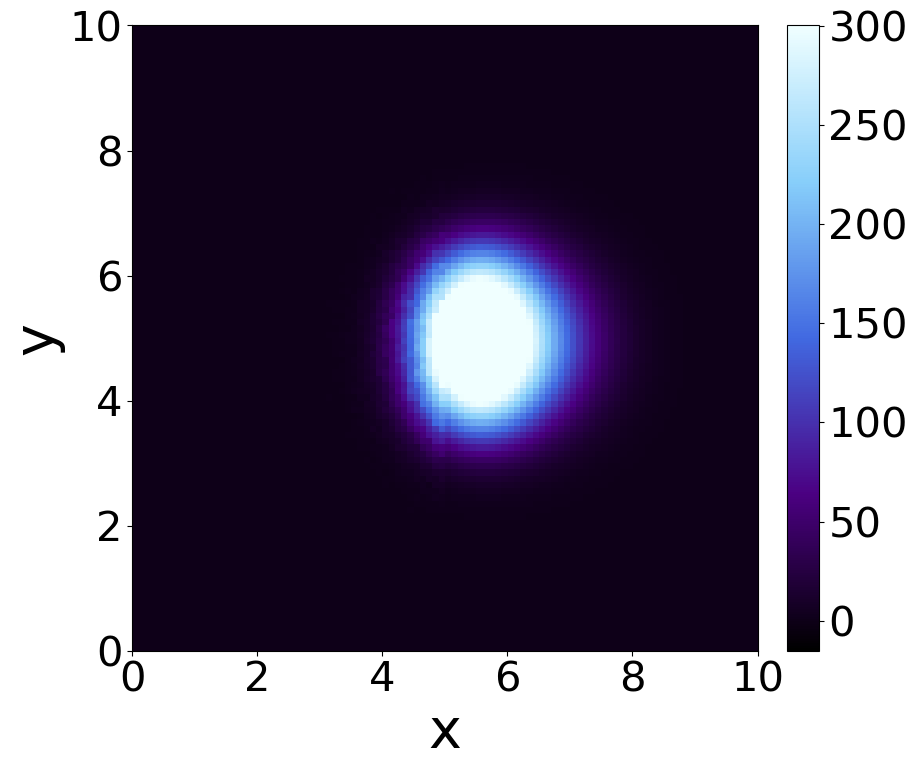

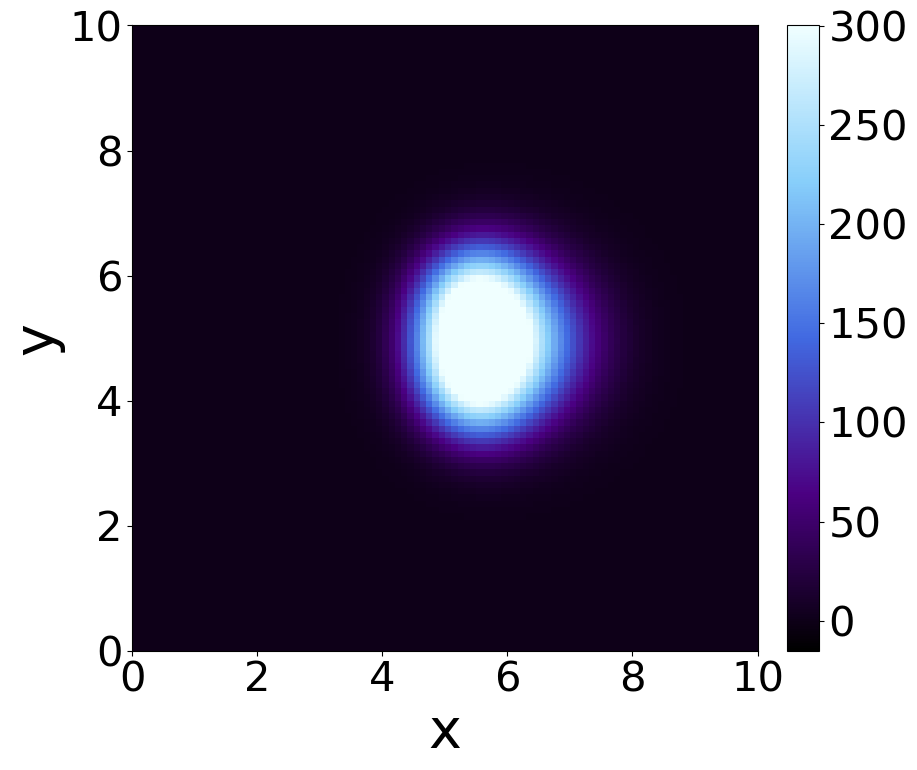

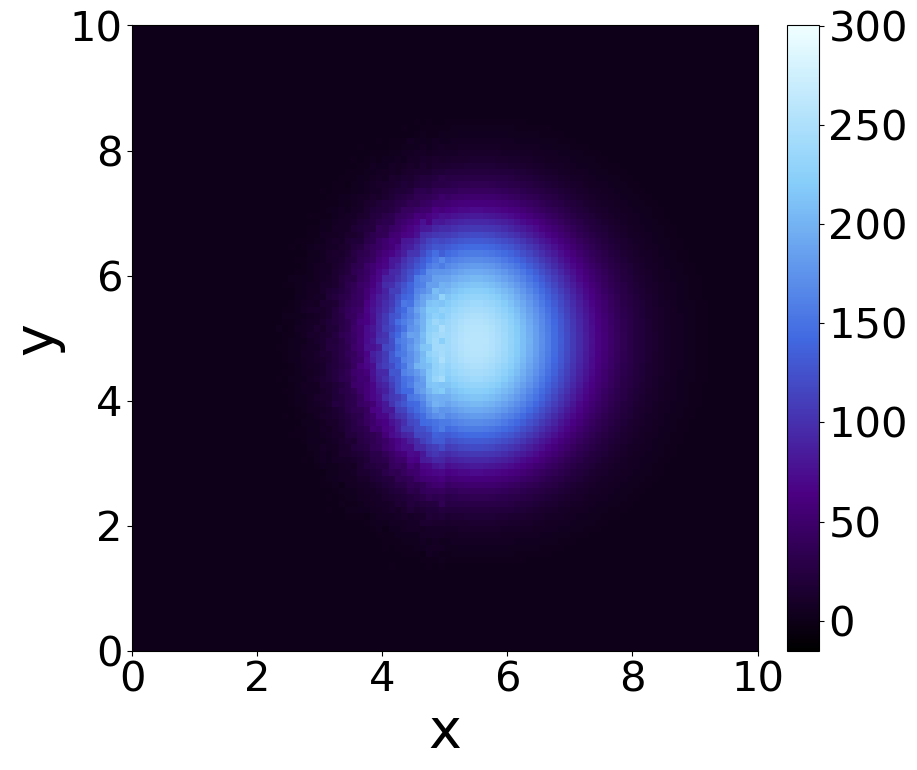

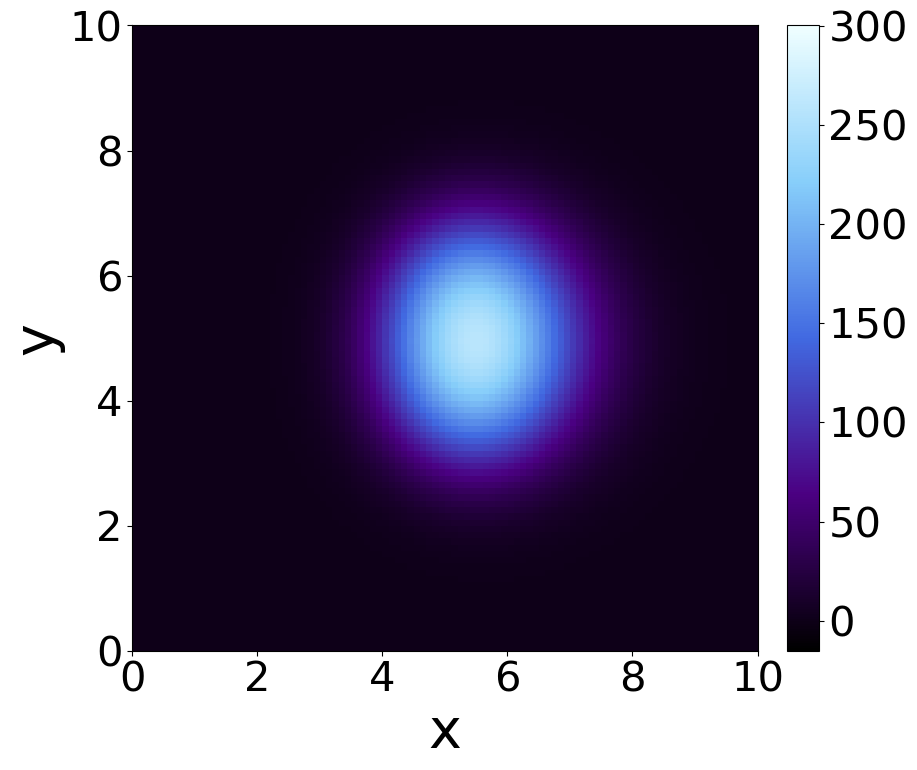

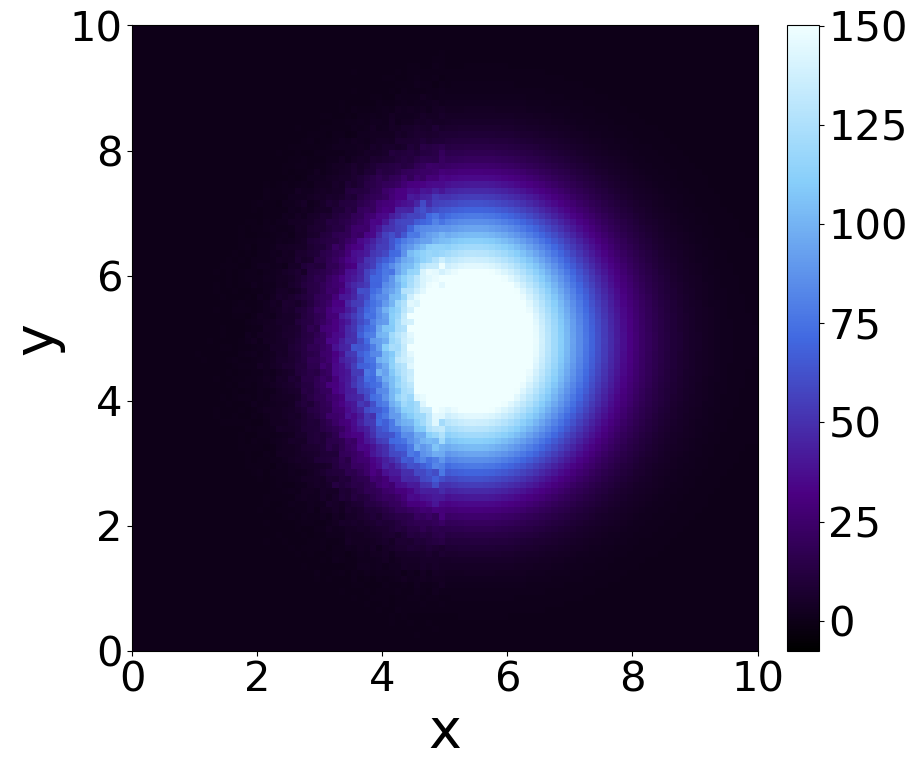

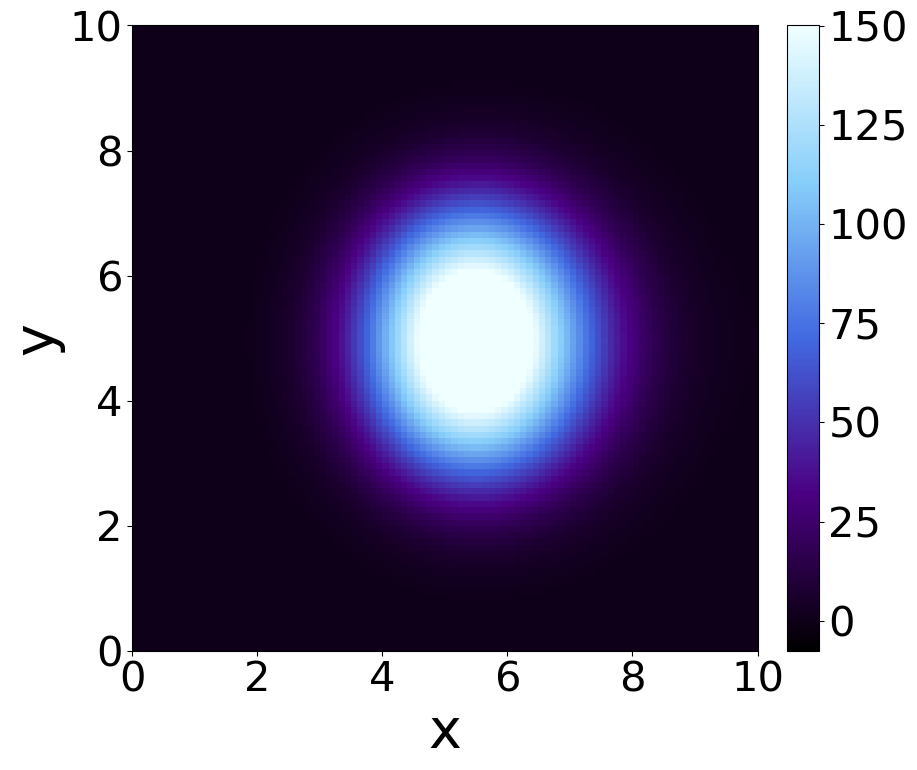

In [17]:
TimeSteps=[9,19,24]


functionplot(HybridPred[TimeSteps[0]], 300, 'HybridPred'+str(np.round((TimeSteps[0]+1)*constant*deltat, decimals=2)))
functionplot(ReferencePred[TimeSteps[0]], 300, 'RefPred'+str(np.round((TimeSteps[0]+1)*constant*deltat, decimals=2)))

print(np.mean(HybridPred[TimeSteps[0]]), np.mean(ReferencePred[TimeSteps[0]]))

functionplot(HybridPred[TimeSteps[1]], 300, 'HybridPred'+str(np.round((TimeSteps[1]+1)*constant*deltat, decimals=2)))
functionplot(ReferencePred[TimeSteps[1]], 300, 'RefPred'+str(np.round((TimeSteps[1]+1)*constant*deltat, decimals=2)))

print(np.mean(HybridPred[TimeSteps[1]]), np.mean(ReferencePred[TimeSteps[1]]))


functionplot(HybridPred[TimeSteps[2]], 150, 'HybridPred'+str(np.round((TimeSteps[2]+1)*constant*deltat, decimals=2)))
functionplot(ReferencePred[TimeSteps[2]], 150, 'RefPred'+str(np.round((TimeSteps[2]+1)*constant*deltat, decimals=2)))

print(np.mean(HybridPred[TimeSteps[2]]), np.mean(ReferencePred[TimeSteps[2]]))